### Notebook for prediction

Make sure you have run the download_data script (or notebook) beforehand.

In [1]:
import numpy as np

from src.dataloader import Dataloader
from src.model import UNet
from src.util import show_prediction

2024-12-21 06:26:06.256285: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-21 06:26:06.256800: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-21 06:26:06.260565: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-21 06:26:06.275755: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734758766.306642    3560 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734758766.31

Let's first load the test data of DIV2K:

In [2]:
image_dir = "../data/div2k-hr-test/"
texture_dir = "../data/textures/"
color_mode = "grayscale"

dataloader = Dataloader(
    image_dir,
    texture_dir,
    image_size=(32 * 21, 32 * 32),  # = (672, 1024)
    batch_size=8,
    color_mode=color_mode,
    validation_split=0.2,
)

test_ds, _ = dataloader.load_datasets(
    noisy=True,
    textured=True,
    texture_alpha=0.1,
    shuffle=True,
)

Found 100 files.


Using 80 files for training.
Using 20 files for validation.


2024-12-21 06:26:10.239883: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Found 64 files.


In [3]:
# load model checkpoint
checkpoint_filepath = "../checkpoints/pretrained-grayscale.weights.h5"
model = UNet(color_mode=color_mode)
model.predict(test_ds.take(1))  # just to build the model
model.load_weights(checkpoint_filepath)

/home/arian/projects/image-restoration/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


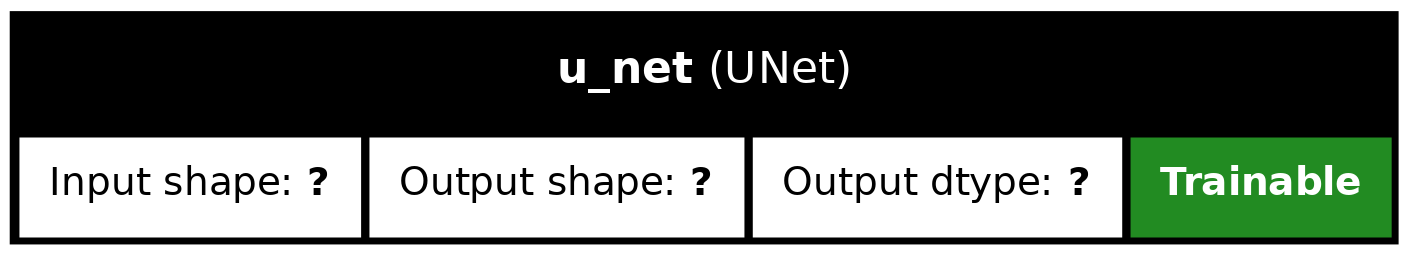

In [7]:
import keras
# keras.utils.plot_model(model, to_file="plot.png", show_shapes=True)
keras.utils.plot_model(
    model,
    to_file="plot.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=200,
    show_layer_activations=True,
    show_trainable=True,
)

Now we're ready to restore some old photos!

In [ ]:
# predict and visualize results
num_samples = 10
for x, y in test_ds.take(num_samples):
    restored = model.predict(x)
    i = np.random.randint(0, len(x), 1)[0]
    show_prediction(y[i], x[i], restored[i], figsize=(20, 20))